<a href="https://colab.research.google.com/github/nguidony/Programaria---An-lise-de-dados-Primeiros-passos-em-python-/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#o q influencia o valor do salario? que variaveis? influencua positiva ou negativa?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dados=pd.read_excel('/content/drive/MyDrive/analise_dados_mod7_(1).xlsx')

In [ ]:
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
dados=dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?']=='Empregado (CLT)']

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [ ]:
#CRIAR UMA LISTA PARA RETIRAR VALORES QUE PODEM ATRAPALHAR - SUPERESTIMAR
lista_retirar=['Prefiro não informar','Outra','Indígena']

In [ ]:
dados=dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [ ]:
dados['NAO_BRANCA']=dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!='Branca' else 0)

In [ ]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [ ]:
dados['TEMPO_EXPERIENCIA']= dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
dados['NUMERO DE FUNCIONARIOS']= dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3,1313
101,503
1,386
501,248
51,146
11,112
6,24


In [ ]:
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
0,127


In [ ]:
dados['TEMPO_EXPERIENCIA']=dados['TEMPO_EXPERIENCIA'].fillna(0)

Até agora vimos como processar colunas que vamos utilizar

In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


In [ ]:
dados['INSATISFACAO']=0

In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in str(x) else 0)

,Qual o principal motivo da sua insatisfação com a empresa atual?
1,0
2,0
7,1
10,0
26,1
...,...
4227,0
4234,1
4238,0
4240,1


In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'INSATISFACAO'] = dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in str(x) else 0)
# The code is trying to assign values to a slice of the DataFrame `dados` using
# `.loc`. The right side of the assignment was modified to be a Series that has
# the same index as the left side of the assignment.

In [ ]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2453
1,279


In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [ ]:
dados['NIVEL DE ENSINO']=dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x=='Não tenho graduação formal' else
                               1 if x=='Estudante de Graduação' else
                               2 if x=='Graduação/Bacharelado' else
                               3 if x=='Pós-graduação' else
                               4 if x=='Mestrado' else
                               5 if x=='Doutorado ou Phd' else -1
                               )

In [ ]:
dados=dados[['IDADE','GENERO','NAO_BRANCA', 'TEMPO_EXPERIENCIA','INSATISFACAO','SETOR','REGIAO ONDE MORA','NIVEL DE ENSINO','NUMERO DE FUNCIONARIOS','SALARIO', 'NOVO_NIVEL']]

In [ ]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

In [ ]:
dados=pd.get_dummies(dados, columns= ['GENERO', 'REGIAO ONDE MORA', 'SETOR', 'NOVO_NIVEL'], drop_first=True)

In [ ]:
#atributos e targets
x=dados.drop('SALARIO', axis=1)
y=dados['SALARIO']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42) ##parte é dos dados e parte do treinamento

In [ ]:
from sklearn.preprocessing import StandardScaler #essa função normaliza os dados

In [ ]:
from sklearn.preprocessing import StandardScaler #essa função normaliza os dados

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression #regressão linear


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse=mean_squared_error(y_test, y_pred)

In [ ]:
mse

23496717.462180067

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae=mean_absolute_error(y_test, y_pred)

In [ ]:
mae

3311.6232066743714

In [ ]:
r2=r2_score(y_test, y_pred)  #quanto mais perto de 1 melhor
r2

0.5205945435739956

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

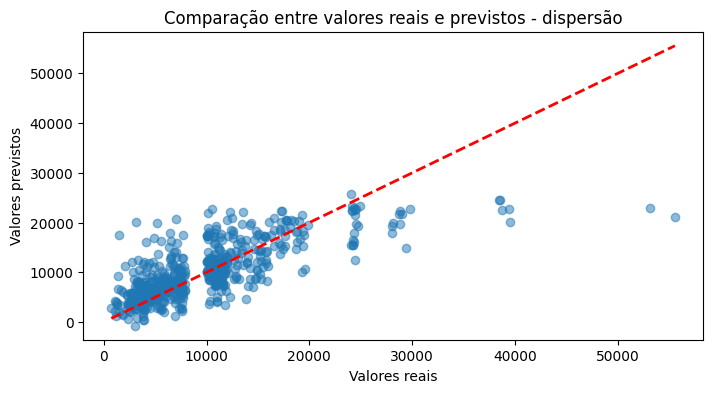

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha= 0.5)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Comparação entre valores reais e previstos - dispersão')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red',linewidth=2)
plt.show

In [ ]:
nomes_atributos=x_train.columns

In [ ]:
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior'],
      dtype='object')

In [ ]:
coefs=pd.DataFrame(model.coef_, index=nomes_atributos, columns=['Coeficientes'])

In [ ]:
coefs=coefs.sort_values(by='Coeficientes', ascending=False)

Text(0.5, 1.0, 'Coeficientes da regressão linear')

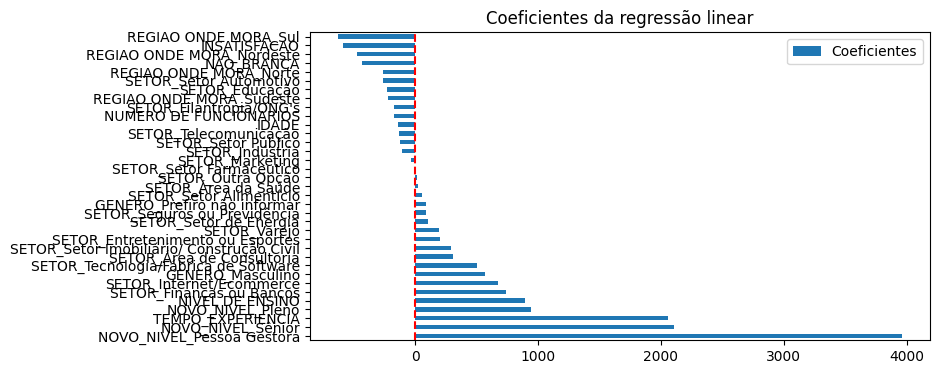

In [ ]:
coefs.plot.barh(figsize=(8,4))
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Coeficientes da regressão linear')